In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

from dataset import VNAgriDataset

# Đọc dữ liệu cà phê

In [2]:
with open("../../data/Ca phe", "r", encoding="utf-16") as file:
    caphe = file.read()

In [3]:
caphe_df = pd.read_html(caphe)[0]
caphe_df.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_2948\3960325749.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  caphe_df = pd.read_html(caphe)[0]


(4845, 8)

In [4]:
caphe_df.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,Cà phê Robusta nhân xô,Đắk Lắk,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128233.0
1,Cà phê Robusta nhân xô,Đắk Nông,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128350.0
2,Cà phê Robusta nhân xô,Gia Lai,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128233.0
3,Cà phê Robusta nhân xô,Kon Tum,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128200.0
4,Cà phê Robusta nhân xô,Lâm Đồng,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128000.0


# Kiểm tra dữ liệu thiếu

In [5]:
caphe_df.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu thừa

In [6]:
caphe_df.duplicated().sum()

np.int64(0)

# Kiểm tra giá trị ngoại lai

In [7]:
gia_caphe = caphe_df["Giá"]

<Axes: ylabel='Giá'>

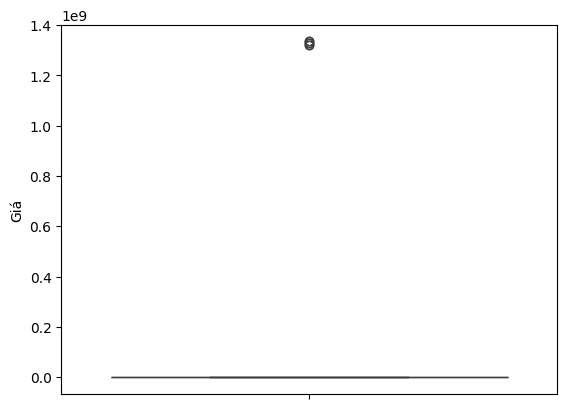

In [21]:
sns.boxplot(y=gia_caphe)

In [19]:
caphe_df["Tên_mặt_hàng"].unique()

array(['Cà phê Robusta nhân xô', 'Cà phê Arabica nhân xô'], dtype=object)

# Kiểm tra mặt hàng riêng biệt

In [9]:
dataset = VNAgriDataset("../../data/Ca phe")
outlier_filtered = dataset.get_outlier_mathang()

d:\University\Nam 3\HK3\Project 3\Code\src\preprocess\dataset.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  self.data = pd.read_html(html)[0]


In [10]:
outlier_filtered

('Cà phê Robusta nhân xô',)

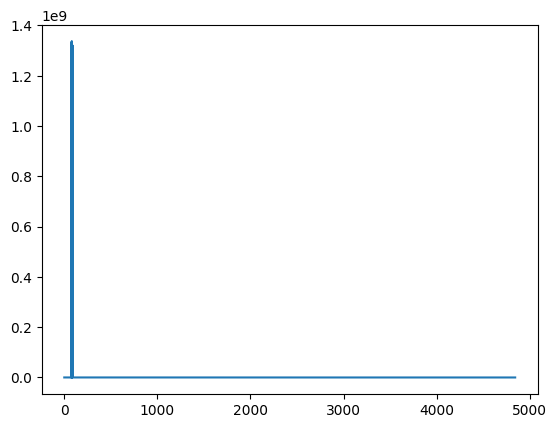

In [11]:
dataset.plot(outlier_filtered[0], 1, 1)

In [13]:
outlier_infos = dataset.get_outlier_infos()
outlier_infos

(('Cà phê Robusta nhân xô',
  np.float64(33500.0),
  np.float64(103025.0),
  np.float64(69525.0),
  np.float64(-70787.5),
  np.float64(207312.5),
  np.int64(6)),)

In [14]:
name = outlier_infos[0][0]
min_val = outlier_infos[0][4]
max_val = outlier_infos[0][5]

In [16]:
outlier_df0 = dataset.get_outlier_mathang_df(name, min_val, max_val)
print(dataset.calc_outlier_perc(name, min_val, max_val))
outlier_df0

0.0012437810945273632


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
75,Cà phê Robusta nhân xô,Đắk Lắk,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-18,1.327333e+09
77,Cà phê Robusta nhân xô,Gia Lai,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-18,1.327333e+09
80,Cà phê Robusta nhân xô,Đắk Lắk,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-17,1.335333e+09
82,Cà phê Robusta nhân xô,Gia Lai,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-17,1.335333e+09
85,Cà phê Robusta nhân xô,Đắk Lắk,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-16,1.321333e+09
87,Cà phê Robusta nhân xô,Gia Lai,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2025-04-16,1.319333e+09


In [17]:
dataset.remove_outlier(name, min_val, max_val)

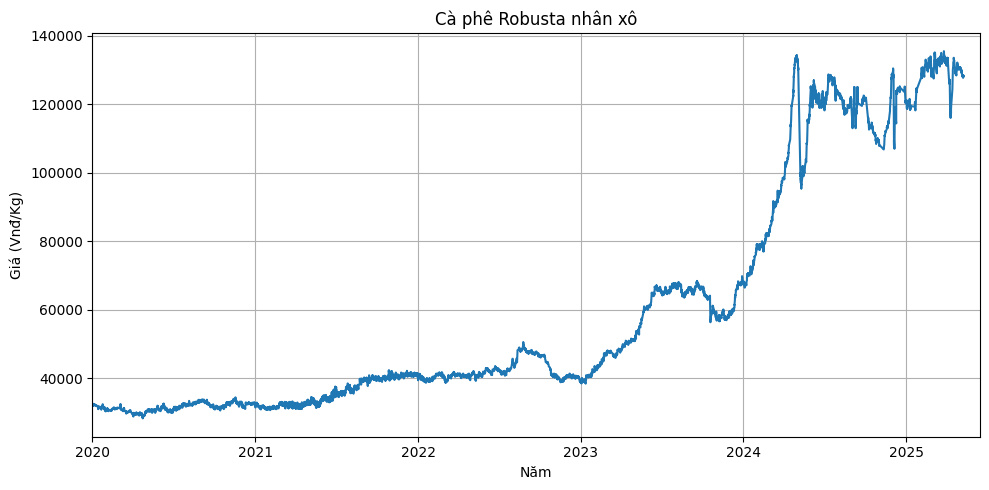

In [18]:
dataset.plot_one(outlier_filtered[0])

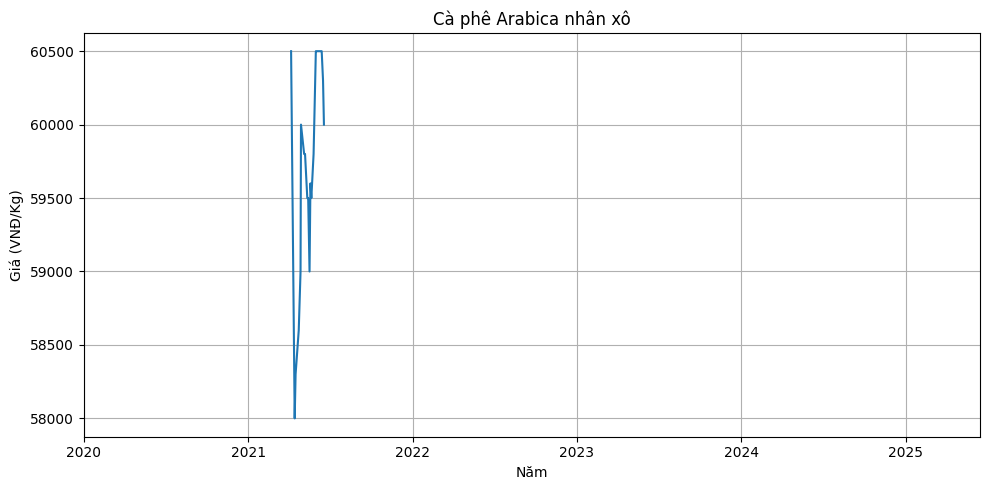

In [20]:
dataset.plot_one("Cà phê Arabica nhân xô")